# Load data

In [27]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

In [74]:
(train_data, train_label) , (test_data,test_label) = cifar10.load_data()

In [29]:
train_data.shape, test_data.shape, train_data.dtype, test_data.dtype

((50000, 32, 32, 3), (10000, 32, 32, 3), dtype('uint8'), dtype('uint8'))

In [30]:
# Class name
class_name = ["airplanes", "cars", "birds", "cats", "deer", "dogs", "frogs", "horses", "ships", "trucks"]
len(class_name)

10

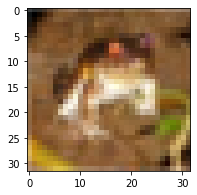

In [31]:
# Show image example
import matplotlib.pyplot as plt
plt.figure(figsize=(3,3))
plt.imshow(train_data[0])

## View random image

In [32]:
import random
import numpy as np

tf.random.set_seed(42)
def view_random_image(images):
  index = np.random.randint(0, len(images))
  image = images[index]

  plt.imshow(image)
  plt.axis(False)

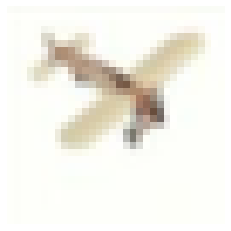

In [33]:
view_random_image(images=train_data)

## Normalize train & test data

In [75]:
train_data = train_data / 255.
test_data = test_data / 255.

In [76]:
train_data.min(), train_data.max()

(0.0, 1.0)

In [77]:
train_label 

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [78]:
# Reshape train_label & test_label
train_label = train_label.reshape(-1)

# Build Model

In [38]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [39]:
model = tf.keras.Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation="relu"),
    Dense(10, activation="softmax")
])

model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

In [40]:
model1 = model.fit(train_data,
                   train_label,
                   epochs = 10,
                   validation_data=(test_data,test_label))

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4672 - accuracy: 0.4750 - val_loss: 1.1696 - val_accuracy: 0.5865
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1027 - accuracy: 0.6150 - val_loss: 1.0556 - val_accuracy: 0.6231
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9705 - accuracy: 0.6626 - val_loss: 0.9652 - val_accuracy: 0.6693
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8935 - accuracy: 0.6886 - val_loss: 0.9506 - val_accuracy: 0.6764
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8261 - accuracy: 0.7133 - val_loss: 0.9005 - val_accuracy: 0.6894
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7698 - accuracy: 0.7319 - val_loss: 0.9057 - val_accuracy: 0.6943
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7197 - accuracy: 0.7484 - val_loss: 0.9378 - val_accuracy:

In [41]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                147520    
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

In [42]:
## Create plot loss curves function
def plot_loss_curves(model):
  acc = model.history["accuracy"]
  val_acc = model.history["val_accuracy"]

  loss = model.history["loss"]
  val_loss=model.history["val_loss"]

  epochs = range(0,len(model.history["loss"]))
  plt.plot(epochs, acc, label="training_accuracy")
  plt.plot(epochs, val_acc, label="test_accuracy")
  plt.xlabel("Epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="test_loss")
  plt.xlabel("Epochs")
  plt.legend()


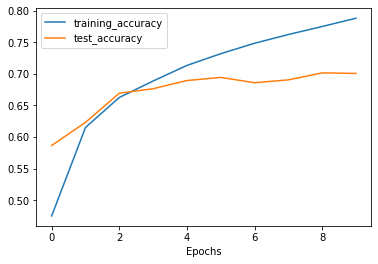

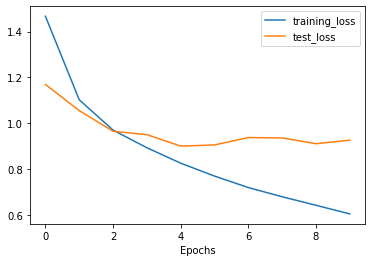

In [43]:
plot_loss_curves(model=model1)

# Improve Model
- Add more layers
- Add BachNormalization() layer
- Add data augmention

## Data augmention

In [79]:
data_train_aug = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=0.2,
                                                                 width_shift_range=0.2,
                                                                 height_shift_range=0.2,
                                                                 horizontal_flip=True)

In [80]:
data_train_augmented = data_train_aug.flow(train_data,train_label, batch_size=32)

## Build Model improve

In [81]:
model2 = tf.keras.Sequential([
    Conv2D(32,(3,3), padding="same", input_shape=(32,32,3), activation="relu"),
    tf.keras.layers.BatchNormalization(),
    Conv2D(32,(3,3), padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    MaxPooling2D(),

    Conv2D(64,(3,3), padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    Conv2D(64,(3,3), padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    MaxPooling2D(),

    Conv2D(128,(3,3), padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    Conv2D(128,(3,3), padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    MaxPooling2D(),

    Flatten(),
    tf.keras.layers.Dropout(0.2),
    Dense(64, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    Dense(10, activation="softmax")
])

model2.compile(loss="sparse_categorical_crossentropy",
               optimizer="adam",
               metrics=["accuracy"])

In [83]:
model_aug = model2.fit(data_train_augmented,
                       epochs = 50,
                       steps_per_epoch = len(data_train_augmented),
                       validation_data = (test_data, test_label),
                       validation_steps = len(test_data))

Epoch 1/50
1563/1563 [==============================] - 51s 32ms/step - loss: 1.7441 - accuracy: 0.3611 - val_loss: 2.2297 - val_accuracy: 0.3681
Epoch 2/50
1563/1563 [==============================] - 50s 32ms/step - loss: 1.3631 - accuracy: 0.5113 - val_loss: 1.1837 - val_accuracy: 0.5873
Epoch 3/50
1563/1563 [==============================] - 50s 32ms/step - loss: 1.1268 - accuracy: 0.6033 - val_loss: 1.0612 - val_accuracy: 0.6420
Epoch 4/50
1563/1563 [==============================] - 47s 30ms/step - loss: 0.9781 - accuracy: 0.6624 - val_loss: 1.1143 - val_accuracy: 0.6640
Epoch 5/50
1563/1563 [==============================] - 46s 30ms/step - loss: 0.8903 - accuracy: 0.6988 - val_loss: 0.7998 - val_accuracy: 0.7236
Epoch 6/50
1563/1563 [==============================] - 45s 29ms/step - loss: 0.8121 - accuracy: 0.7267 - val_loss: 0.6642 - val_accuracy: 0.7792
Epoch 7/50
1563/1563 [==============================] - 46s 30ms/step - loss: 0.7571 - accuracy: 0.7464 - val_loss: 0.7792 -

## Evaluation

In [161]:
import numpy as np 
y_preds = model2.predict(test_data)

In [162]:
y_preds_class = [np.argmax(element) for element in y_preds]

In [170]:
from sklearn.metrics import confusion_matrix, classification_report
print("Classification Report:", classification_report(test_label, y_preds_class))

Classification Report:               precision    recall  f1-score   support

           0       0.89      0.82      0.85      1000
           1       0.93      0.95      0.94      1000
           2       0.87      0.77      0.82      1000
           3       0.78      0.73      0.76      1000
           4       0.83      0.87      0.85      1000
           5       0.88      0.75      0.81      1000
           6       0.77      0.95      0.85      1000
           7       0.85      0.92      0.89      1000
           8       0.91      0.94      0.92      1000
           9       0.93      0.92      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



## Plot loss curves

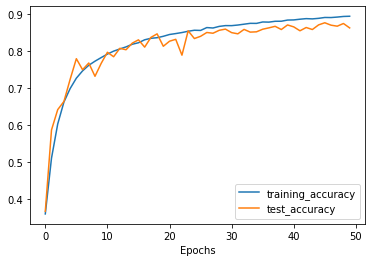

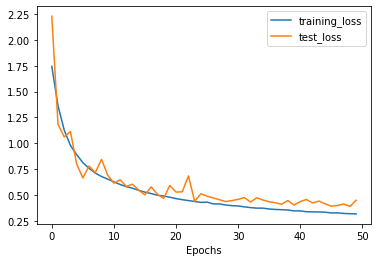

In [84]:
plot_loss_curves(model_aug)

## Create function predict random image

In [89]:
y_pred = model2.predict(tf.expand_dims(test_data[0], axis = 0))
y_pred

array([[6.5873455e-06, 4.2059521e-05, 2.0875383e-02, 8.3241177e-01,
        1.1770196e-04, 1.3702609e-01, 9.1047753e-03, 3.8823520e-04,
        2.5178197e-05, 2.2346387e-06]], dtype=float32)

In [91]:
class_name[y_pred.argmax()]

'cats'

In [151]:
test_label

<tf.Tensor: shape=(10000,), dtype=uint8, numpy=array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)>

Text(0.5, 1.0, 'True label: cats => Predict: cats')

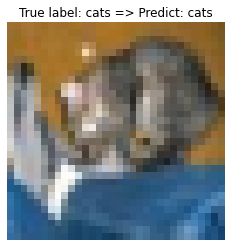

In [152]:
# Visualize
plt.imshow(test_data[0])
plt.axis(False)
plt.title(f"True label: {class_name[(test_label[0])]} => Predict: {class_name[y_pred.argmax()]}")

In [159]:
import random
def predict_random_image(model, images, labels):
  index = random.randint(0, len(test_data))
  image = images[index]

  preds = model2.predict(tf.expand_dims(image, axis = 0))
  name_preds = class_name[preds.argmax()]

  true_label = class_name[(labels[index])]
  plt.imshow(image)
  plt.title(f"True label: {true_label} => Predict: {name_preds}" )

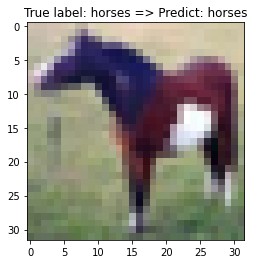

In [160]:
predict_random_image(model=model2, images = test_data, labels = test_label)

# Save Model

In [172]:
save_dir = "/content/drive/MyDrive/tensorflow_project/CNN/CIFAR10_dataset_CNN"
model2.save(save_dir)

INFO:tensorflow:Assets written to: /content/drive/MyDrive/tensorflow_project/CNN/CIFAR10_dataset_CNN/assets
